## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
Train = pd.read_csv("data/Train.csv")
Test = pd.read_csv("data/Test.csv")

In [3]:
print('The Train Dataset has {} observations(rows) and {} variables(columns)'.format(Train.shape[0],Train.shape[1]))
print()
print('The Test Dataset has {} observations(rows) and {} variables(columns)'.format(Test.shape[0],Test.shape[1]))

The Train Dataset has 400000 observations(rows) and 19 variables(columns)

The Test Dataset has 100000 observations(rows) and 18 variables(columns)


In [4]:
#preview the dataset
Train.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [5]:
#feature set?
Train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [201]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [6]:
#what features are categorical?
categorical_features = Train.select_dtypes(include=['object','category']).columns.tolist()

#what features are numerical?
numerical_features = Train.select_dtypes(include=['int64','float64']).columns.tolist()
print("categorical features", categorical_features)
print()
print("numerical features",numerical_features)

categorical features ['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']

numerical features ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN']


## Univariate Analysis

In [7]:
Train.CHURN.value_counts()/Train.shape[0]

0    0.81289
1    0.18711
Name: CHURN, dtype: float64

- Dataset is Highly Unabalanced
    - 81.3% of clients stopped using expresso's services.
    - 18.7% of Clients are still expresso's customers.

In [9]:
df = Train.REGION.value_counts()
print("Number of Client's whose region are unknown:",Train['REGION'].isnull().sum())
print(f"Percentage of clients whose region are known: {df.sum()/Train.shape[0]*100}%")
df.sort_values()

Number of Client's whose region are unknown: 157520
Percentage of clients whose region are known: 60.62%


KEDOUGOU         181
SEDHIOU          589
ZIGUINCHOR      4012
MATAM           5255
FATICK          6638
KOLDA           7204
KAFFRINE        8181
TAMBACOUNDA    10273
DIOURBEL       12576
KAOLACK        18042
LOUGA          18513
SAINT-LOUIS    22125
THIES          33374
DAKAR          95517
Name: REGION, dtype: int64

- There are more clients from Dakar. Large difference is understandable as Dakar is the capital city.
- There are few customers from states such as Sedhiou and Kedougou, since they have more rural settlements.
- Only 60% of Client's location are known.
- The largest fraction of **Churned** was observed in Dakar and Thies.

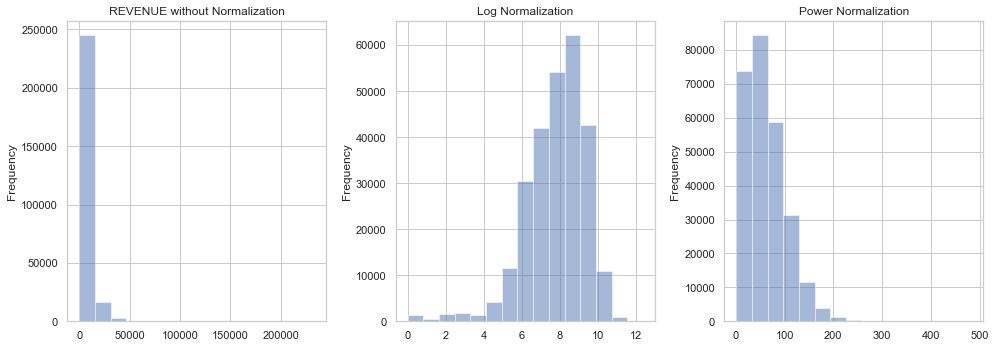

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5)) #create subplot axes
df = Train[['REVENUE']] # Create a pandas DataFrame out of the numpy array
df.plot.hist(alpha=0.5, bins=15, grid=True,title="REVENUE without Normalization", legend=None,ax=axes[0])  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
df_exp = df.apply(np.log)   # pd.DataFrame.apply accepts a function to apply to each column of the data
df_exp.plot.hist(alpha=0.5, bins=15, grid=True, title ='Log Normalization',legend=None,ax=axes[1])
df_pow = df.apply(np.sqrt)
df_pow.plot.hist(alpha=0.5, bins=15, grid=True,title="Power Normalization", legend=None,ax=axes[2])
plt.subplots_adjust(hspace=0.6)
fig.tight_layout()
plt.show()

 - client's revenue is heavily skewed. 
    - Log Normalization works best for correction/Normalization.

## Bi_variate Analysis

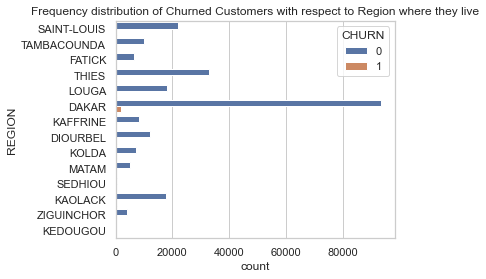

REGION        
DAKAR        0    93656
             1     1861
DIOURBEL     0    12218
             1      358
FATICK       0     6533
             1      105
KAFFRINE     0     8133
             1       48
KAOLACK      0    17617
             1      425
KEDOUGOU     0      173
             1        8
KOLDA        0     7130
             1       74
LOUGA        0    18215
             1      298
MATAM        0     5132
             1      123
SAINT-LOUIS  0    21833
             1      292
SEDHIOU      0      570
             1       19
TAMBACOUNDA  0    10107
             1      166
THIES        0    32827
             1      547
ZIGUINCHOR   0     3912
             1      100
Name: CHURN, dtype: int64

In [13]:
f, ax = plt.subplots(figsize=(5, 4))
ax = sns.countplot(y="REGION", hue="CHURN", data=Train)
plt.title('Frequency distribution of Churned Customers with respect to Region where they live')
plt.show()
Train[['REGION','CHURN']].groupby('REGION')['CHURN'].apply(pd.value_counts)

<AxesSubplot:xlabel='REVENUE', ylabel='REGION'>

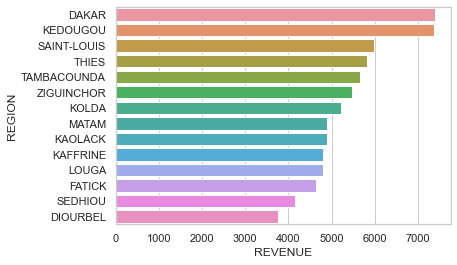

In [14]:
# Average Monthly income per region
df = Train[['REVENUE',"REGION"]].groupby('REGION').mean()
df =df.reset_index().sort_values(ascending=False,by='REVENUE')

sns.barplot(x = 'REVENUE',y = 'REGION',data = df)

<AxesSubplot:xlabel='REVENUE', ylabel='TENURE'>

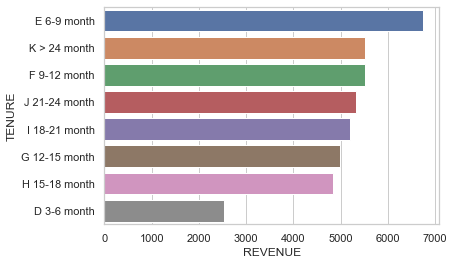

In [15]:
# Average Monthly income per region
df = Train[['REVENUE',"TENURE"]].groupby('TENURE').mean()
df =df.reset_index().sort_values(ascending=False,by='REVENUE')
fig=px.histogram(df,x='TENURE',y='REVENUE')

sns.barplot(x = 'REVENUE',y = 'TENURE',data = df)

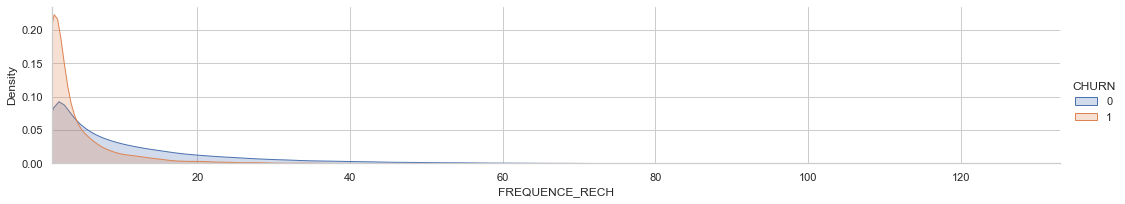

In [16]:
#density plot
def kdeplot(feature,data):
    facet =sns.FacetGrid(data, hue='CHURN', aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(data[feature].min() ,data[feature].max()))
    facet.add_legend()
kdeplot('FREQUENCE_RECH',Train)

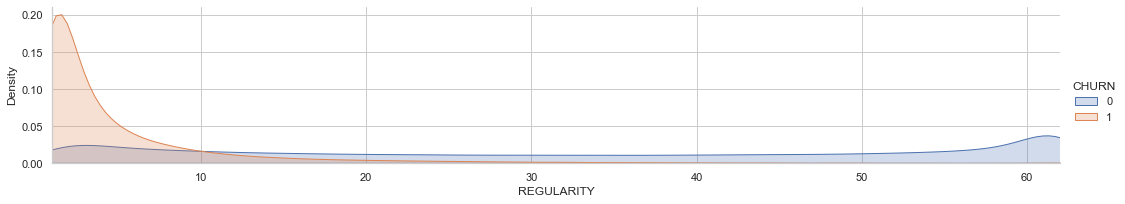

In [17]:
kdeplot('REGULARITY',Train)

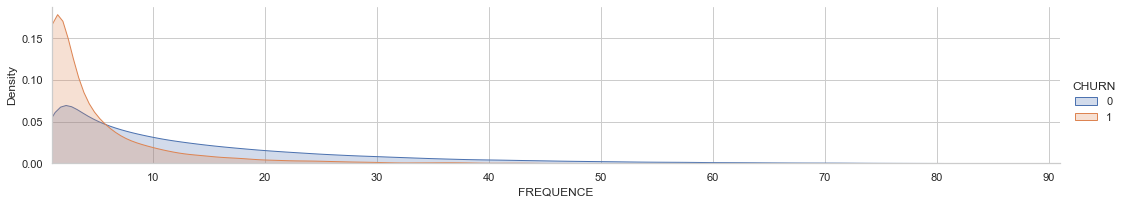

In [18]:
kdeplot('FREQUENCE',Train)

- Kernel density Plots revealed that most of **FREQUENCE, REGULARITY and FREQUENCE_RECH** variables are all heavily skewed to the left

In [19]:
Train[['REVENUE','REGION']].groupby("REGION").skew()

,REVENUE
REGION,
DAKAR,3.649262
DIOURBEL,3.430972
FATICK,3.553852
KAFFRINE,2.805810
KAOLACK,3.019257
KEDOUGOU,2.023921
KOLDA,2.777455
LOUGA,2.937383
MATAM,3.785318


- As expected the highest distortion in revenue is observed in the capital State Dakar.
- States with high urban population tends to have more distortion in client's revenue.

## Multivariate Analysis

#### CORRELATION HEATMAP

In [20]:
Train.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.800385,0.979041,0.979041,0.781164,0.308343,0.327857,0.667531,0.427289,0.350551,0.407973,0.524157,0.742406,-0.106229
FREQUENCE_RECH,0.800385,1.000000,0.807405,0.807405,0.956262,0.165226,0.402383,0.522649,0.348092,0.126573,0.160979,0.557178,0.866833,-0.123113
REVENUE,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425376,0.355228,0.377622,0.534122,0.751785,-0.114822
ARPU_SEGMENT,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425377,0.355228,0.377623,0.534120,0.751785,-0.114822
FREQUENCE,0.781164,0.956262,0.791627,0.791627,1.000000,0.181491,0.392656,0.475057,0.311898,0.113051,0.164952,0.591314,0.843150,-0.139685
DATA_VOLUME,0.308343,0.165226,0.312915,0.312915,0.181491,1.000000,-0.014683,0.066746,0.029573,0.034982,0.054873,0.198813,0.126535,-0.036015
ON_NET,0.327857,0.402383,0.331850,0.331850,0.392656,-0.014683,1.000000,0.218051,0.138315,0.010337,-0.018135,0.268487,0.351834,-0.057701
ORANGE,0.667531,0.522649,0.670220,0.670220,0.475057,0.066746,0.218051,1.000000,0.408712,0.042190,0.016740,0.310284,0.557338,-0.063382
TIGO,0.427289,0.348092,0.425376,0.425377,0.311898,0.029573,0.138315,0.408712,1.000000,0.006882,0.015626,0.197842,0.375953,-0.035890
ZONE1,0.350551,0.126573,0.355228,0.355228,0.113051,0.034982,0.010337,0.042190,0.006882,1.000000,0.041978,0.042619,0.187581,0.019937


<AxesSubplot:>

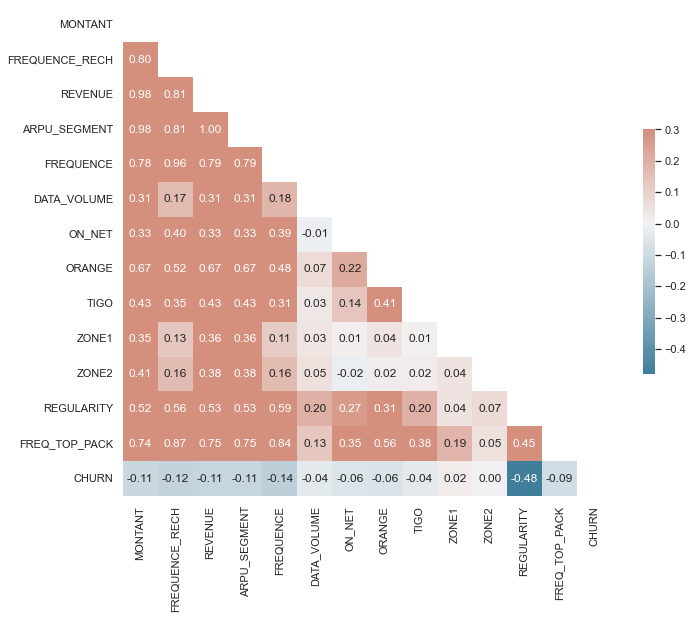

In [21]:
#correlation heatmap plot
corr = Train[numerical_features].corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,annot=True, fmt='.2f',vmax=.3,cbar_kws={'shrink':.5})

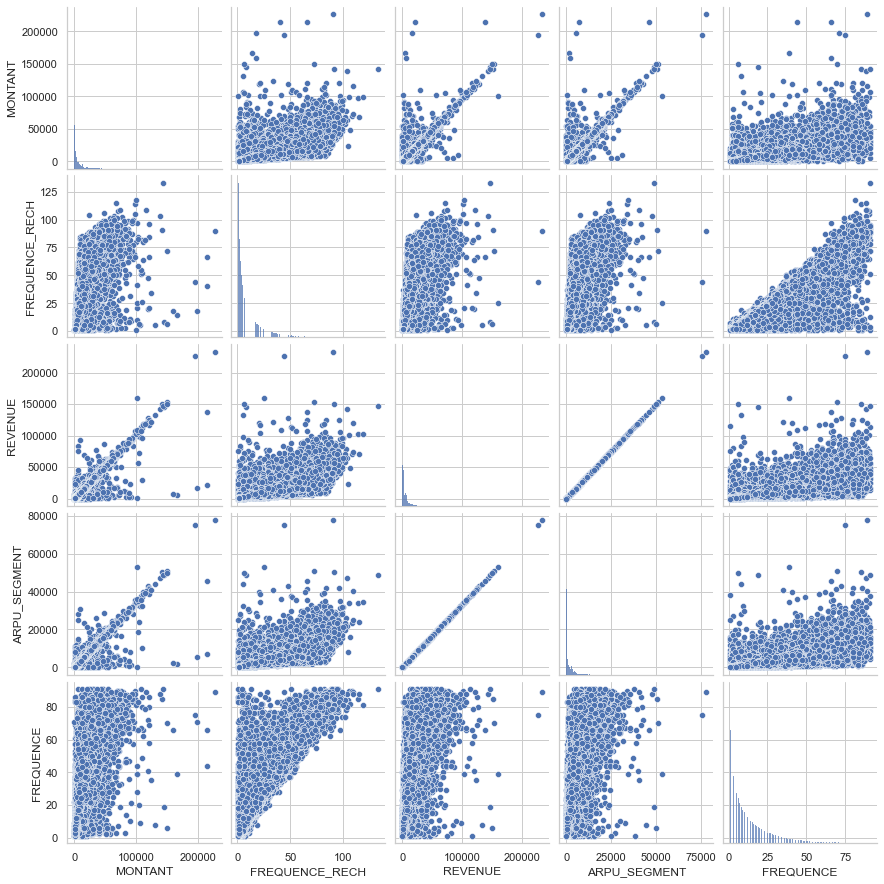

In [22]:
sns.pairplot(Train[numerical_features[:5]], kind='scatter', diag_kind='hist')
plt.show()

#### Conditional relationship for top 2 Highly Urbanized states 

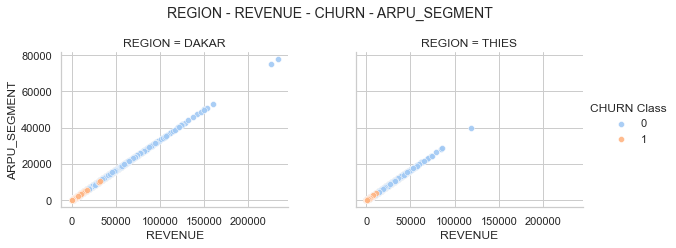

In [23]:
#plotting conditional relationship using Multi-plot grid.
sns.set_style("whitegrid")
g = sns.FacetGrid(Train, col="REGION", hue='CHURN',col_order=['DAKAR', 'THIES'], 
hue_order=[0,1],aspect=1.2, height=3.5, palette='pastel')
g.map(plt.scatter, "REVENUE", "ARPU_SEGMENT", alpha=0.9,edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('REGION - REVENUE - CHURN - ARPU_SEGMENT', fontsize=14)
#Add legend
l = g.add_legend(title='CHURN Class')


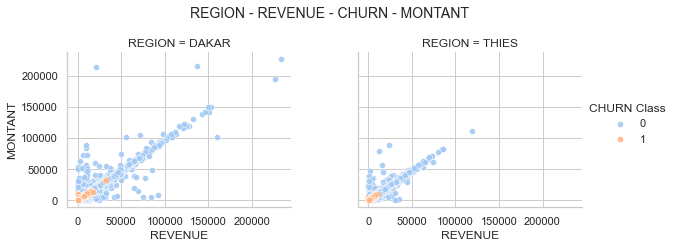

In [24]:
#plotting conditional relationship using Multi-plot grid.
sns.set_style("whitegrid")
g = sns.FacetGrid(Train, col="REGION", hue='CHURN',col_order=['DAKAR', 'THIES'], 
hue_order=[0,1],aspect=1.2, height=3.5, palette="pastel")
g.map(plt.scatter, "REVENUE", "MONTANT", alpha=0.9,edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('REGION - REVENUE - CHURN - MONTANT', fontsize=14)
#Add legend
l = g.add_legend(title='CHURN Class')


- low region of values for REVENUE, ARPU_segment and MONTANT were noticed for Urbanized states.
- possible correlation between TENURE and (REVENUE, ARPU_segment).

#### Conditional relationship for top 2 highly rural states

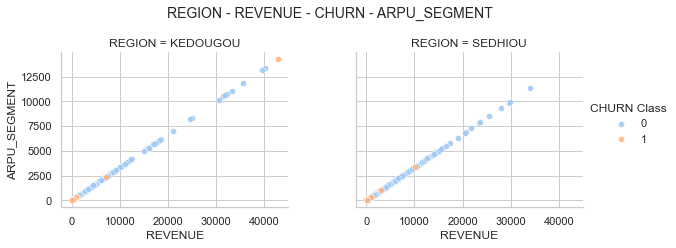

In [25]:
#plotting conditional relationship using Multi-plot grid.
sns.set_style("whitegrid")
g = sns.FacetGrid(Train, col="REGION", hue='CHURN',col_order=['KEDOUGOU', 'SEDHIOU'], 
hue_order=[0,1],aspect=1.2, height=3.5, palette='pastel')
g.map(plt.scatter, "REVENUE", "ARPU_SEGMENT", alpha=0.9,edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('REGION - REVENUE - CHURN - ARPU_SEGMENT', fontsize=14)
#Add legend
l = g.add_legend(title='CHURN Class')


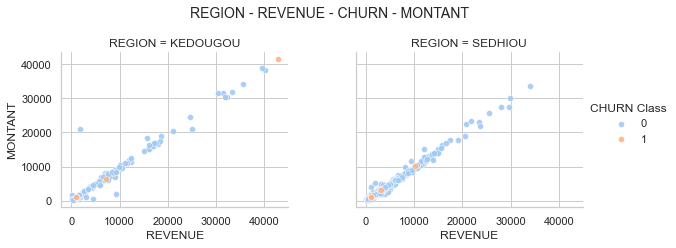

In [26]:
#plotting conditional relationship using Multi-plot grid.
sns.set_style("whitegrid")
g = sns.FacetGrid(Train, col="REGION", hue='CHURN',col_order=['KEDOUGOU', 'SEDHIOU'], 
hue_order=[0,1],aspect=1.2, height=3.5, palette="pastel")
g.map(plt.scatter, "REVENUE", "MONTANT", alpha=0.9,edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('REGION - REVENUE - CHURN - MONTANT', fontsize=14)
#Add legend
l = g.add_legend(title='CHURN Class')


- sparsely spaced values for REVENUE, ARPU_segment and MONTANT were noticed for less developed states.
- possible correlation between TENURE and (REVENUE, MONTANT).  